In [1]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.8.0-cp39-cp39-macosx_12_0_universal2.macosx_10_9_x86_64.whl (55.6 MB)
  Using cached matplotlib-3.5.1-cp39-cp39-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached kiwisolver-1.4.2-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
  Using cached Pillow-9.1.0-cp39-cp39-macosx_10_9_x86_64.whl (3.1 MB)
     |████████████████████████████████| 900 kB 5.0 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
You should consider upgrading via the '/Users/cjm/repos/linkml-test/venv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

In [5]:
df = pd.read_csv('input/obo-validation-results.tsv', sep='\t')

In [6]:
df

,type,severity,subject,instantiates,predicate,object,object_str,source,info
0,http://www.w3.org/ns/shacl#MinCountConstraintC...,WARNING,CL:0000003,None,IAO:0000115,None,None,aeo,Missing slot (definition) for CL:0000003
1,http://www.w3.org/ns/shacl#MinCountConstraintC...,WARNING,CL:0000012,None,IAO:0000115,None,None,aeo,Missing slot (definition) for CL:0000012
2,http://www.w3.org/ns/shacl#MinCountConstraintC...,WARNING,CL:0000029,None,IAO:0000115,None,None,aeo,Missing slot (definition) for CL:0000029
3,http://www.w3.org/ns/shacl#MinCountConstraintC...,WARNING,CL:0000031,None,IAO:0000115,None,None,aeo,Missing slot (definition) for CL:0000031
4,http://www.w3.org/ns/shacl#MinCountConstraintC...,WARNING,CL:0000068,None,IAO:0000115,None,None,aeo,Missing slot (definition) for CL:0000068
...,...,...,...,...,...,...,...,...,...
115304,http://www.w3.org/ns/shacl#ClosedConstraintCom...,ERROR,UBERON:3000972,None,obo:UBPROP_0000004,None,None,zp,Unknown pred (obo:UBPROP_0000004) = None This ...
115305,http://www.w3.org/ns/shacl#ClosedConstraintCom...,ERROR,UBERON:3000977,None,obo:UBPROP_0000004,None,None,zp,Unknown pred (obo:UBPROP_0000004) = None This ...
115306,http://www.w3.org/ns/shacl#ClosedConstraintCom...,ERROR,UBERON:3000982,None,obo:UBPROP_0000004,None,None,zp,Unknown pred (obo:UBPROP_0000004) = None This ...
115307,http://www.w3.org/ns/shacl#ClosedConstraintCom...,ERROR,UBERON:4000020,None,obo:UBPROP_0000004,None,None,zp,Unknown pred (obo:UBPROP_0000004) = None This ...


In [51]:
df_src_type = df.groupby(['source', 'type']).size().reset_index().pivot(columns='type', index='source', values=0)
df_src_type

type,http://www.w3.org/ns/shacl#ClosedConstraintComponent,http://www.w3.org/ns/shacl#DatatypeConstraintComponent,http://www.w3.org/ns/shacl#MaxCountConstraintComponent,http://www.w3.org/ns/shacl#MinCountConstraintComponent,https://w3id.org/linkml/reportDeprecatedPropertyComponent
source,,,,,
aeo,6.0,49.0,NaN,15.0,NaN
agro,347.0,296.0,10.0,81.0,86.0
amphx,22.0,NaN,NaN,49.0,NaN
apo,17.0,98.0,2.0,36.0,38.0
apollo_sv,545.0,308.0,32.0,51.0,19.0
...,...,...,...,...,...
xpo,244.0,92.0,NaN,15.0,98.0
zeco,18.0,NaN,NaN,42.0,NaN
zfa,16.0,99.0,NaN,49.0,98.0


Text(0, 0.5, '')

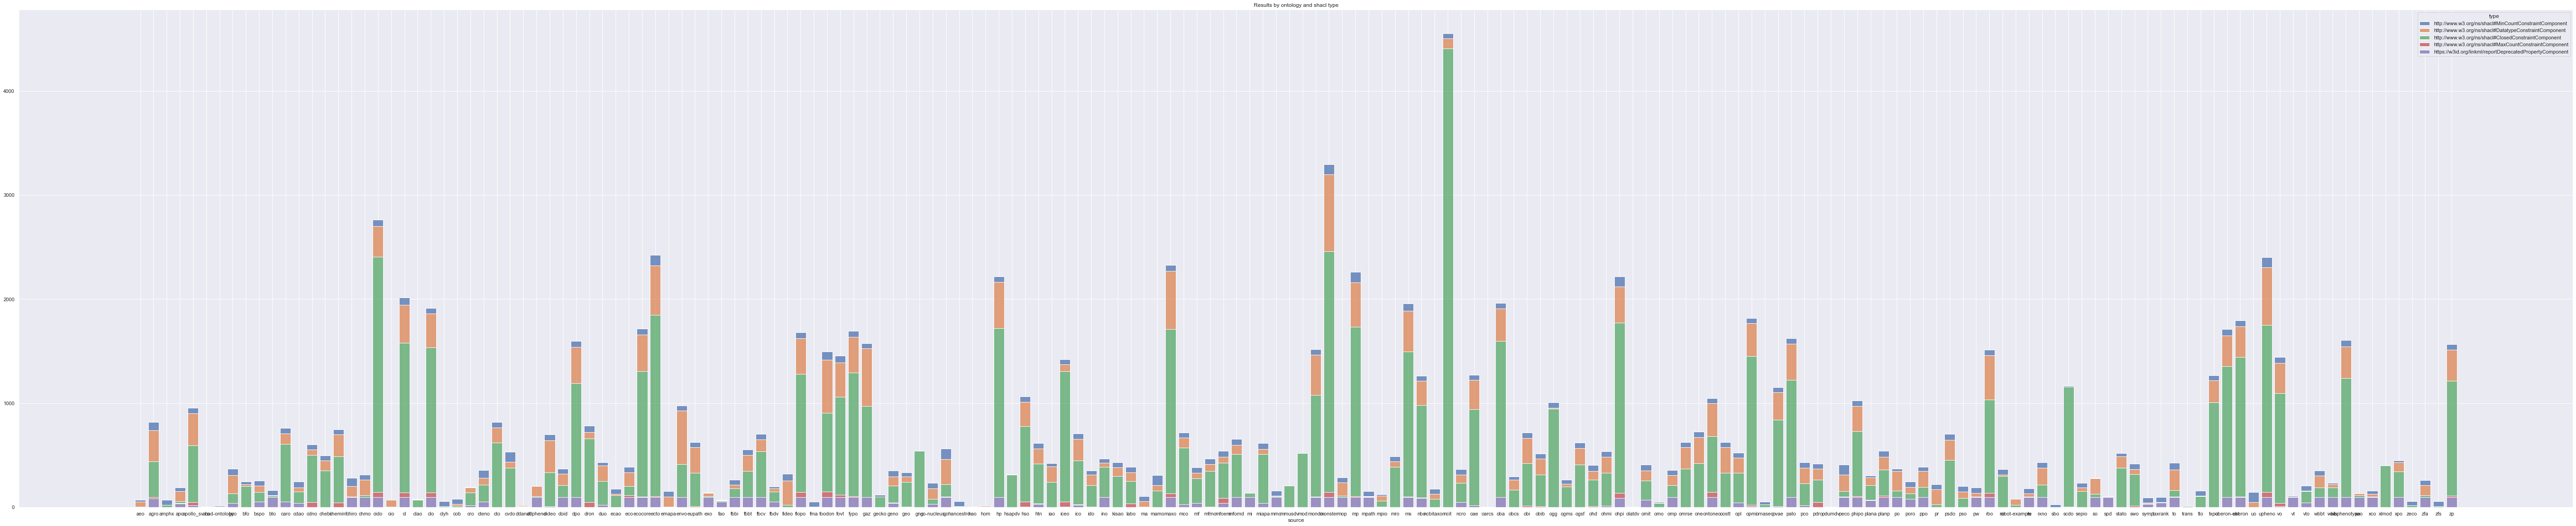

In [48]:
sns.set(rc={'figure.figsize':(100,20)})
ax = sns.histplot(
    df,
    x='source',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    #weights='tip',
    hue='type',
    multiple='stack',
    #palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
    legend=True,
    #rotation=45
)
#ax.set_xticklabels(
#    ax.get_xticklabels(), 
#    rotation=45, 
#    horizontalalignment='right',
#)
ax.set_title('Results by ontology and shacl type')

# Remove 'Count' ylabel.
ax.set_ylabel(None)

Text(0, 0.5, '')

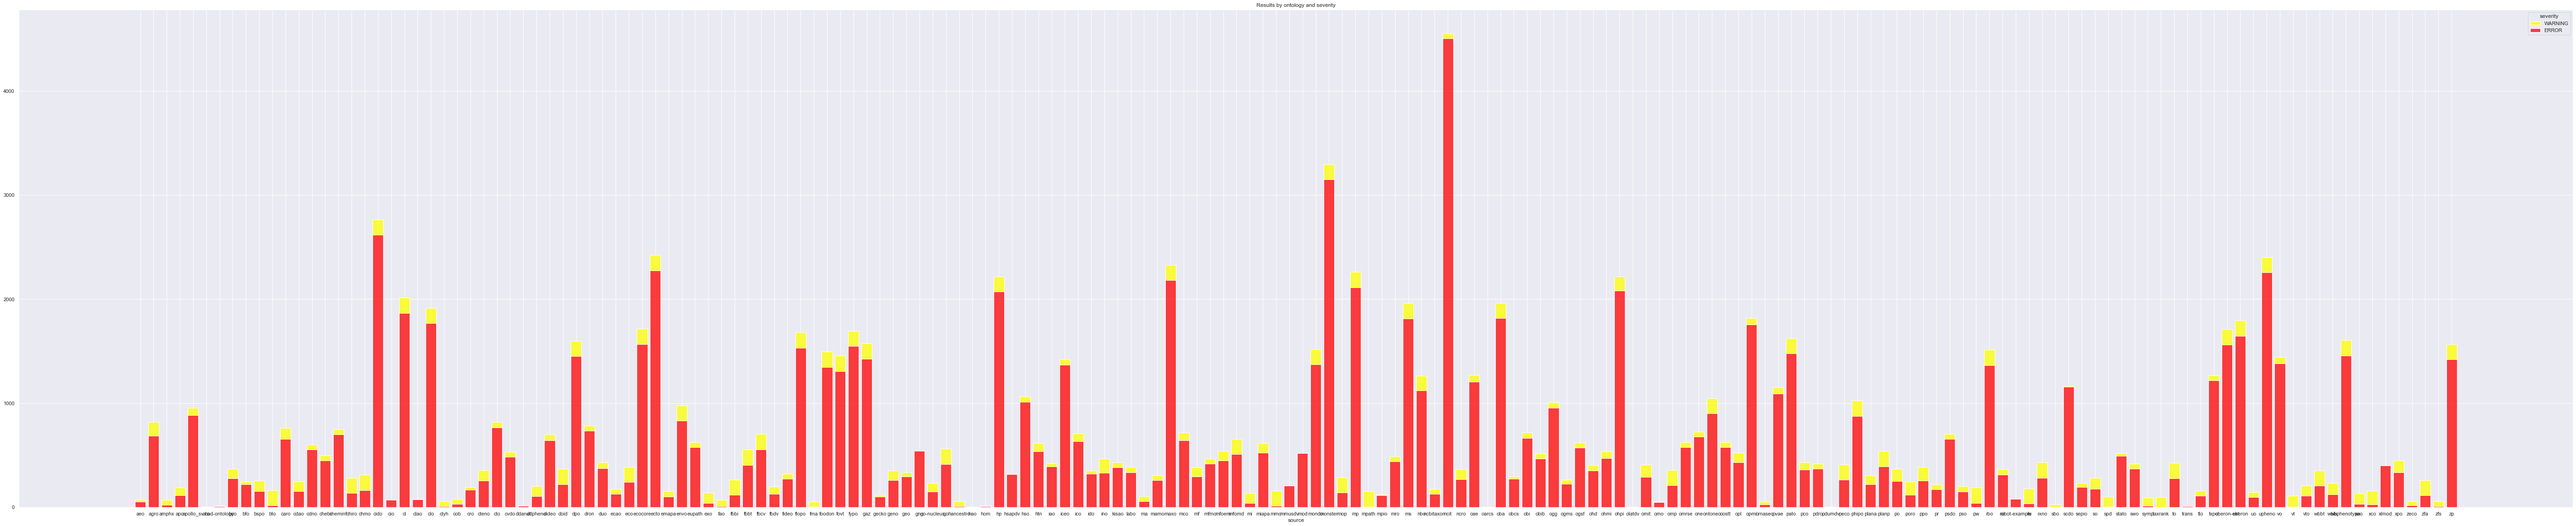

In [50]:
ax = sns.histplot(
    df,
    x='source',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    #weights='tip',
    hue='severity',
    multiple='stack',
    palette=['#ffff00', '#ff0000'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
    #rotation=45
)
#ax.set_xticklabels(
#    ax.get_xticklabels(), 
#    rotation=45, 
#    horizontalalignment='right',
#)
ax.set_title('Results by ontology and severity')

# Remove 'Count' ylabel.
ax.set_ylabel(None)

Text(0, 0.5, '')

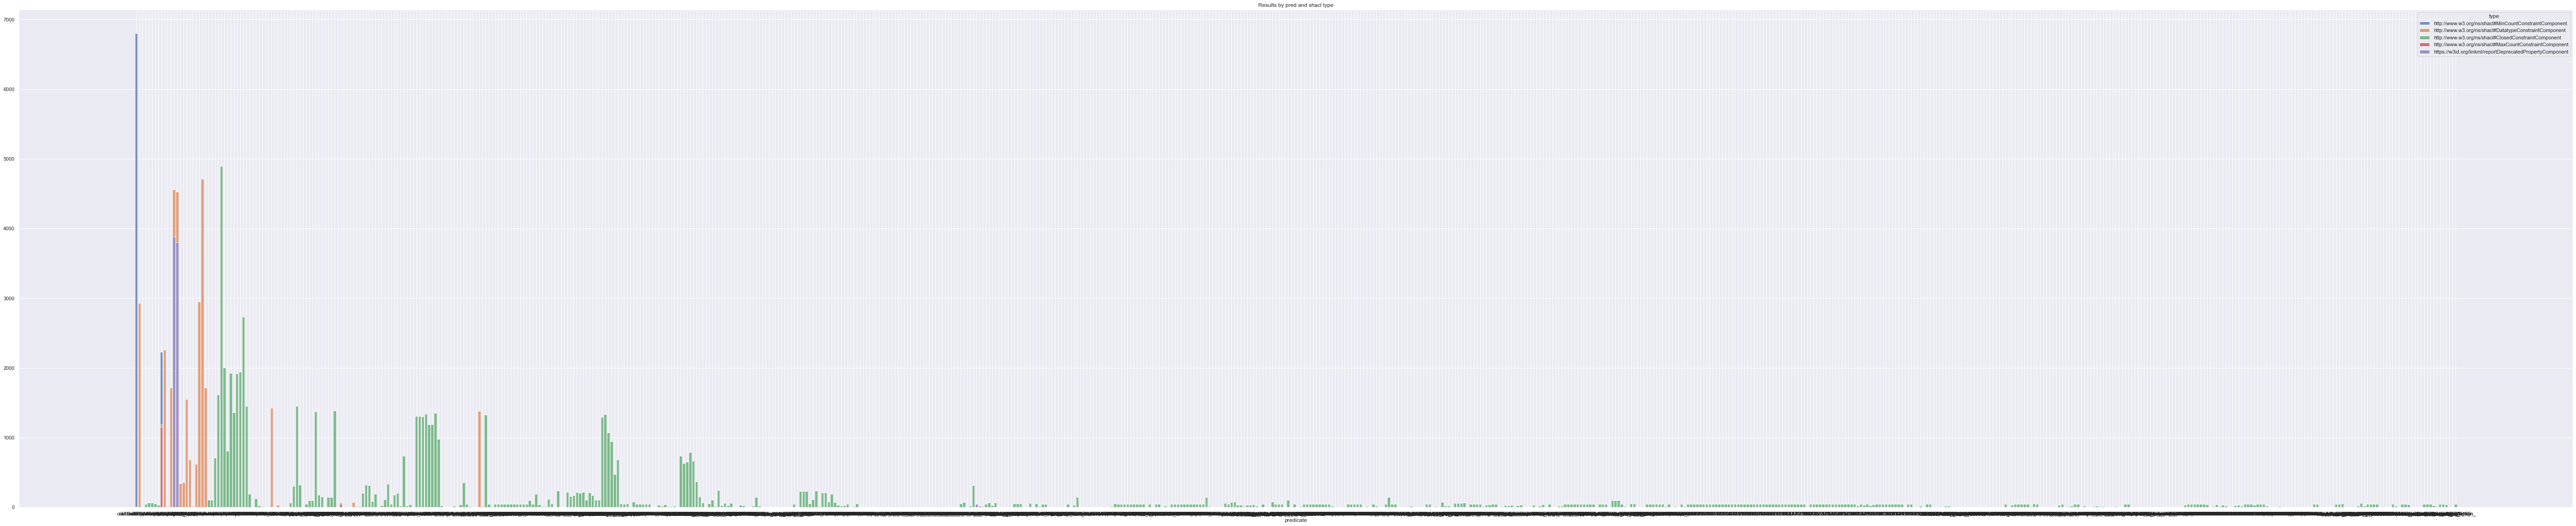

In [52]:
sns.set(rc={'figure.figsize':(100,20)})
ax = sns.histplot(
    df,
    x='predicate',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    #weights='tip',
    hue='type',
    multiple='stack',
    #palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
    legend=True,
    #rotation=45
)
#ax.set_xticklabels(
#    ax.get_xticklabels(), 
#    rotation=45, 
#    horizontalalignment='right',
#)
ax.set_title('Results by pred and shacl type')

# Remove 'Count' ylabel.
ax.set_ylabel(None)